As part of your duties as senior data scientist for the famous ThomasTrain company, you are assigned to understand the satisfaction of the customers even without a direct evaluation. 
To accomplish this task, the company provided you with the “trains_dataset.csv”.
 Understanding the customers’ satisfaction will help the marketing team to effectively target users with promotions and making the retention higher.


Assignment:
- Perform an Explanatory data analysis (EDA) with visualization;
- Generate a training and test set. The test set should be used only at the end;
- Preprocess the dataset (remove outliers, impute missing values, encode categorical features with one hot encoding, not necessarily in this order). Your goal is to estimate whether a customer is satisfied;
- Define whether this is a regression, classification or clustering problem, explain why and choose your model design accordingly. Test at least 3 different models. First, create a validation set from the training set to analyze the behaviour with the default hyperparameters. Then use cross-validation to find the best set of hyperparameters. You must describe every hyperparameter tuned (the more, the better);
- Select the best architecture using the right metric;
- Finally, compute the performances of the test set.


# Importing libraries

In [37]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
import requests

# Reading the input file

In [38]:
df_trains = pd.read_csv('trains.csv')

# EDA

# 1) Understanding the dataset

In [39]:
df_trains.head()

,Legroom Service Rating,Onboard General Rating,Food'n'Drink Rating,Age,Departure Arrival Time Rating,Onboard WiFi Rating,Ticket ID,Checkin Rating,Track Location Rating,Baggage Handling Rating,...,Online Booking Rating,Satisfied,Onboard Entertainment Rating,Date and Time,Distance,Seat Comfort Rating,Work or Leisure,Departure Delay in Minutes,Onboard Service Rating,Cleanliness Rating
0,3,5,5,13,4,3,4718594,4,1,4,...,3,N,5,2016-02-19 10:53,460,5,leisure,25,4,5
1,5,4,1,25,2,3,1048580,1,3,3,...,3,N,1,2016-02-26 15:39,235,1,work,1,1,1
2,3,4,5,26,2,2,3670024,4,2,4,...,2,Y,5,2016-02-26 07:26,1142,5,work,0,4,5
3,5,4,2,25,5,2,3145737,1,5,3,...,5,N,2,2016-02-27 08:32,562,2,work,11,2,2
4,4,3,4,61,3,3,5767177,3,3,4,...,3,Y,3,2016-02-27 14:37,214,5,work,0,3,3


In [40]:
print('Rows: ' + str(df_trains.shape[0]))

Rows: 129880


In [51]:
# Explore basic statistics

summary_stats = df_trains.describe()
summary_stats

,Legroom Service Rating,Onboard General Rating,Food'n'Drink Rating,Age,Departure Arrival Time Rating,Onboard WiFi Rating,Ticket ID,Checkin Rating,Track Location Rating,Baggage Handling Rating,Arrival Delay in Minutes,Boarding Rating,Online Booking Rating,Onboard Entertainment Rating,Distance,Seat Comfort Rating,Departure Delay in Minutes,Onboard Service Rating,Cleanliness Rating
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,1.298800e+05,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,3.350878,3.642193,3.204774,39.427957,3.057599,2.728696,5.494025e+06,3.306267,2.976925,3.632114,15.091129,3.252633,2.756876,3.358077,1190.316392,3.441361,14.713713,3.383023,3.286326
std,1.316252,1.176669,1.329933,15.119360,1.526741,1.329340,2.596965e+06,1.266185,1.278520,1.180025,38.465650,1.350719,1.401740,1.334049,997.452477,1.319289,38.071126,1.287099,1.313682
min,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000025e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,2.000000,27.000000,2.000000,2.000000,3.239218e+06,3.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,414.000000,2.000000,0.000000,2.000000,2.000000
50%,4.000000,4.000000,3.000000,40.000000,3.000000,3.000000,5.495646e+06,3.000000,3.000000,4.000000,0.000000,3.000000,3.000000,4.000000,844.000000,4.000000,0.000000,4.000000,3.000000
75%,4.000000,5.000000,4.000000,51.000000,4.000000,4.000000,7.739715e+06,4.000000,4.000000,5.000000,13.000000,4.000000,4.000000,4.000000,1744.000000,5.000000,12.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,85.000000,5.000000,5.000000,9.999975e+06,5.000000,5.000000,5.000000,1584.000000,5.000000,5.000000,5.000000,4983.000000,5.000000,1592.000000,5.000000,5.000000


# 2) Checking data integrity

In [41]:
# Check for missing values

missing_values = df_trains.isnull().sum()
missing_values

Legroom Service Rating             0
Onboard General Rating             0
Food'n'Drink Rating                0
Age                                0
Departure Arrival Time Rating      0
Onboard WiFi Rating                0
Ticket ID                          0
Checkin Rating                     0
Track Location Rating              0
Baggage Handling Rating            0
Arrival Delay in Minutes         393
Ticket Class                       0
Loyalty                            0
Gender                             0
Boarding Rating                    0
Online Booking Rating              0
Satisfied                          0
Onboard Entertainment Rating       0
Date and Time                      0
Distance                           0
Seat Comfort Rating                0
Work or Leisure                    0
Departure Delay in Minutes         0
Onboard Service Rating             0
Cleanliness Rating                 0
dtype: int64

# 3) Visualizing missing data

In [42]:
import missingno as msno

<AxesSubplot:>

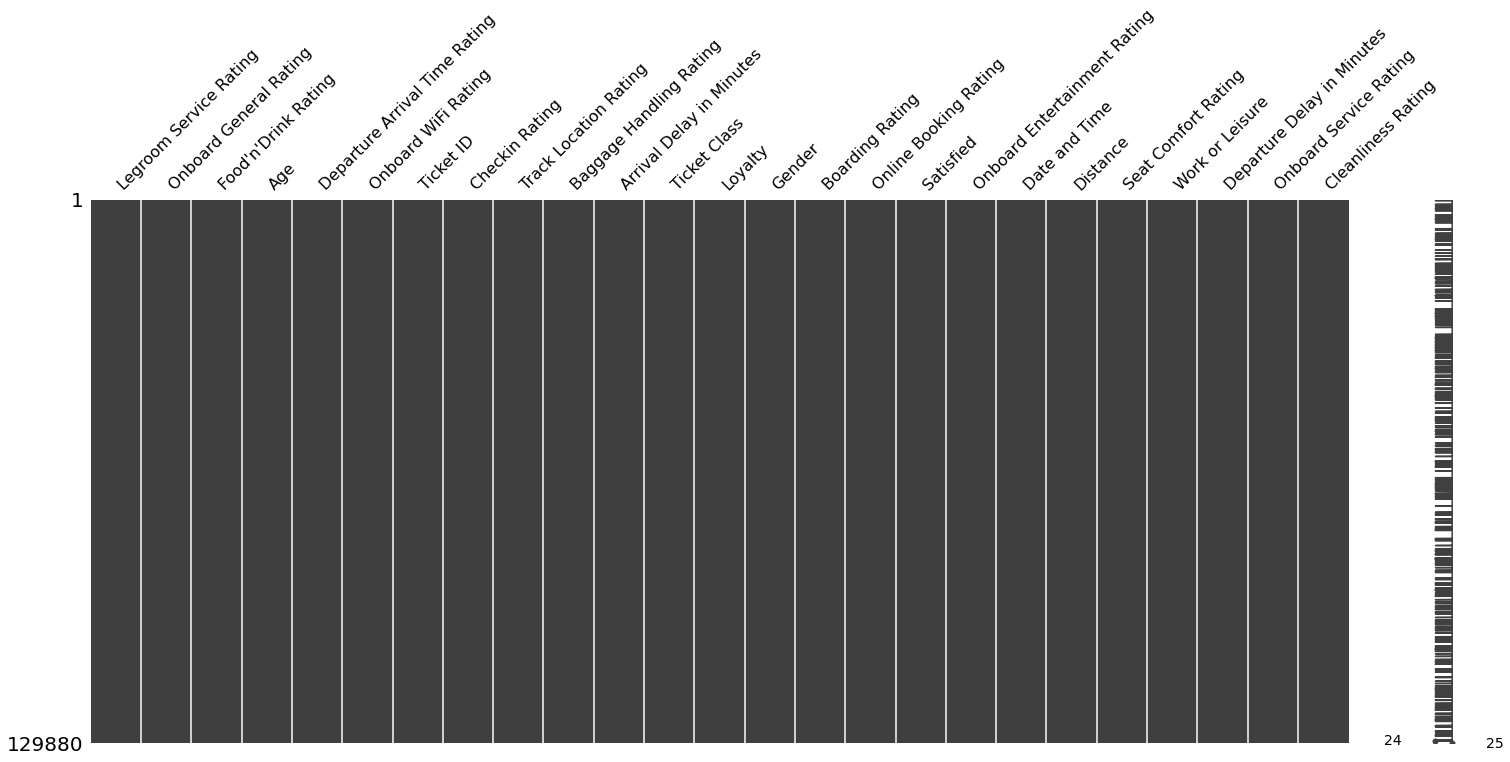

In [43]:
msno.matrix(df_trains)

<AxesSubplot:>

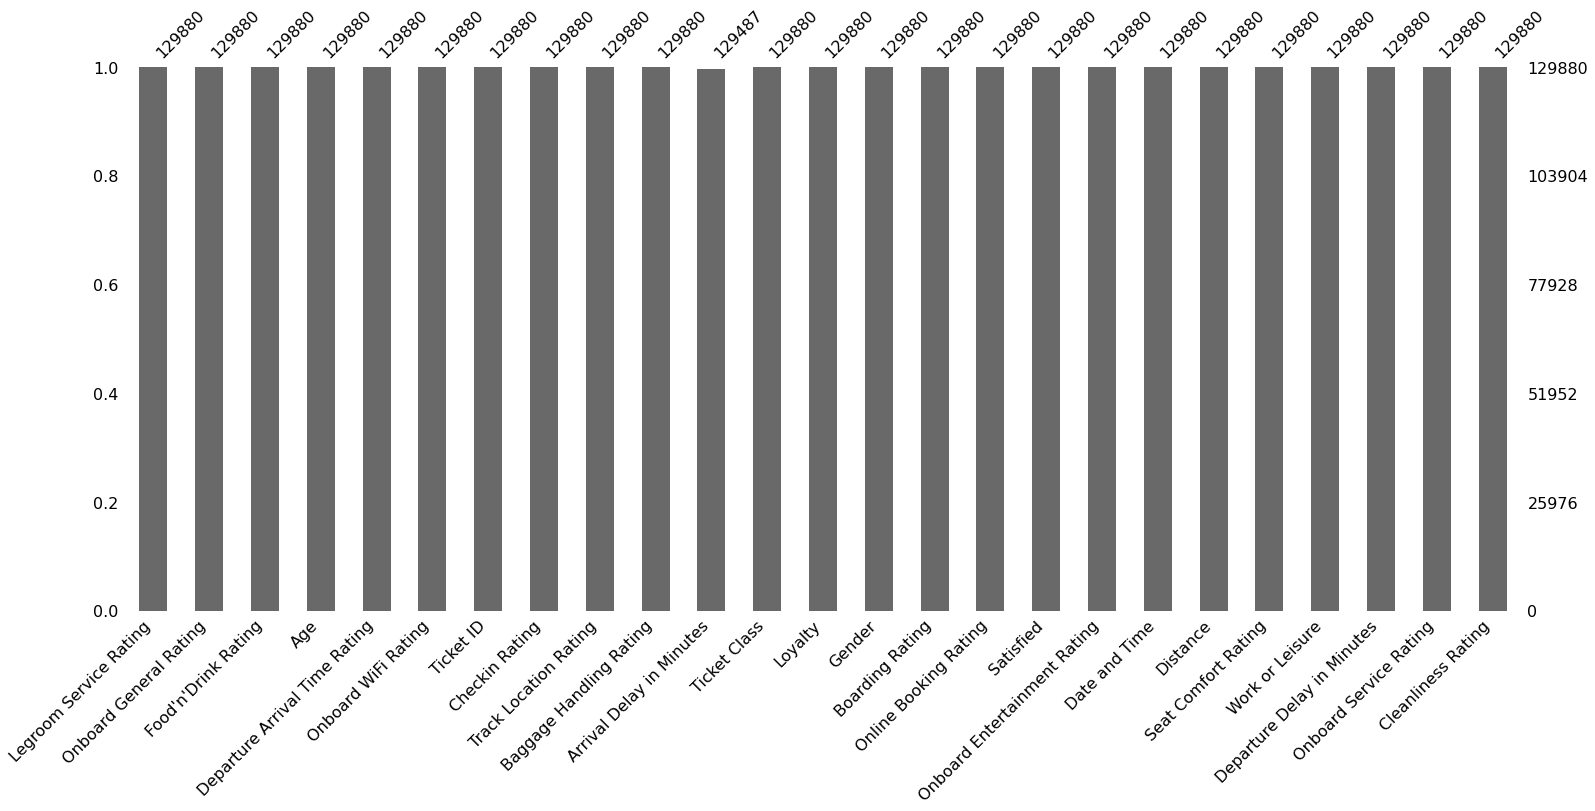

In [44]:
msno.bar(df_trains)

In [45]:
#msno.heatmap(df_trains, cmap='YlGnBu', labels=True)

In [46]:
def missing_values_table(df_trains):
        # Total missing values
        mis_val = df_trains.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df_trains.isnull().sum() / len(df_trains)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df_trains.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(df_trains)

Your selected dataframe has 25 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Arrival Delay in Minutes,393,0.3


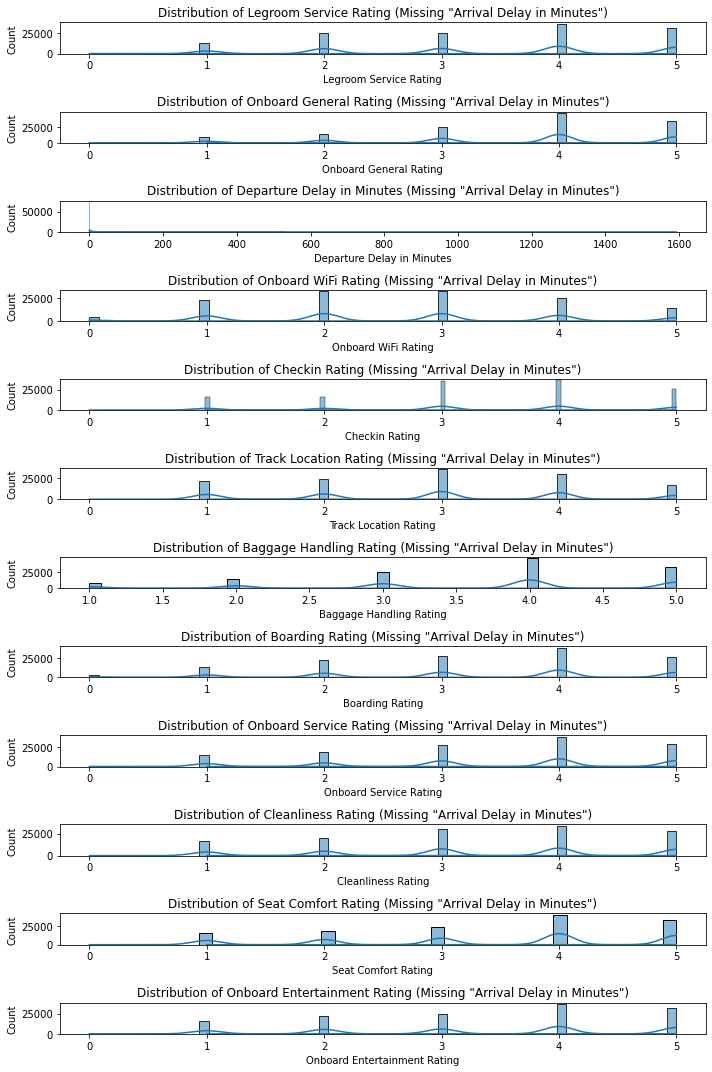

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter rows where 'deck' is NaN
missing_rows = df_trains[df_trains['Arrival Delay in Minutes'].isnull()]

# Select columns to create distribution plots
selected_columns = ['Legroom Service Rating', 'Onboard General Rating', 'Departure Delay in Minutes', 'Onboard WiFi Rating', 'Checkin Rating', 'Track Location Rating', 'Baggage Handling Rating', 'Boarding Rating', 'Onboard Service Rating', 'Cleanliness Rating', 'Seat Comfort Rating', 'Onboard Entertainment Rating']


# Create a figure with subplots
fig, axes = plt.subplots(len(selected_columns), 1, figsize=(10, 15))

# Plot distribution plots for each selected column
for i, col in enumerate(selected_columns):
    sns.histplot(data=missing_rows, x=col, ax=axes[i], kde=True)
    sns.histplot(data=df_trains, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col} (Missing "Arrival Delay in Minutes")')

# Adjust spacing between subplots for better readability
plt.tight_layout()

# Show the plots
plt.show()

In [48]:
#Drop rows with missing values
# Approach 1a: Drop rows with missing 'deck' values
dropped_rows = df_trains.dropna(subset=['Arrival Delay in Minutes'])

# Calculate the number of rows dropped
rows_dropped = len(df_trains) - len(dropped_rows)

# Print the number of rows dropped
print(f"Number of Rows Dropped: {rows_dropped}")

Number of Rows Dropped: 393


In [49]:
# Approach 1b: Drop the 'deck' column
dropped_deck_column = df_trains.drop('Arrival Delay in Minutes', axis=1)

In [50]:
from sklearn.impute import SimpleImputer

# Approach 2: Impute missing 'deck' values using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = df_trains.copy()
df_imputed['Arrival Delay in Minutes'] = imputer.fit_transform(df_imputed[['Arrival Delay in Minutes']])

# Check the number of missing values after imputation
missing_values_after_imputation = df_imputed['Arrival Delay in Minutes'].isnull().sum()

# Print the number of missing values after imputation
print(f"Number of Missing Values after Imputation: {missing_values_after_imputation}")

Number of Missing Values after Imputation: 0


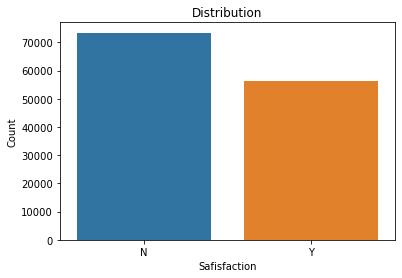

In [52]:
# Countplots

sns.countplot(data=df_trains, x='Satisfied')
plt.title('Distribution')
plt.xlabel('Safisfaction')
plt.ylabel('Count')
plt.show()

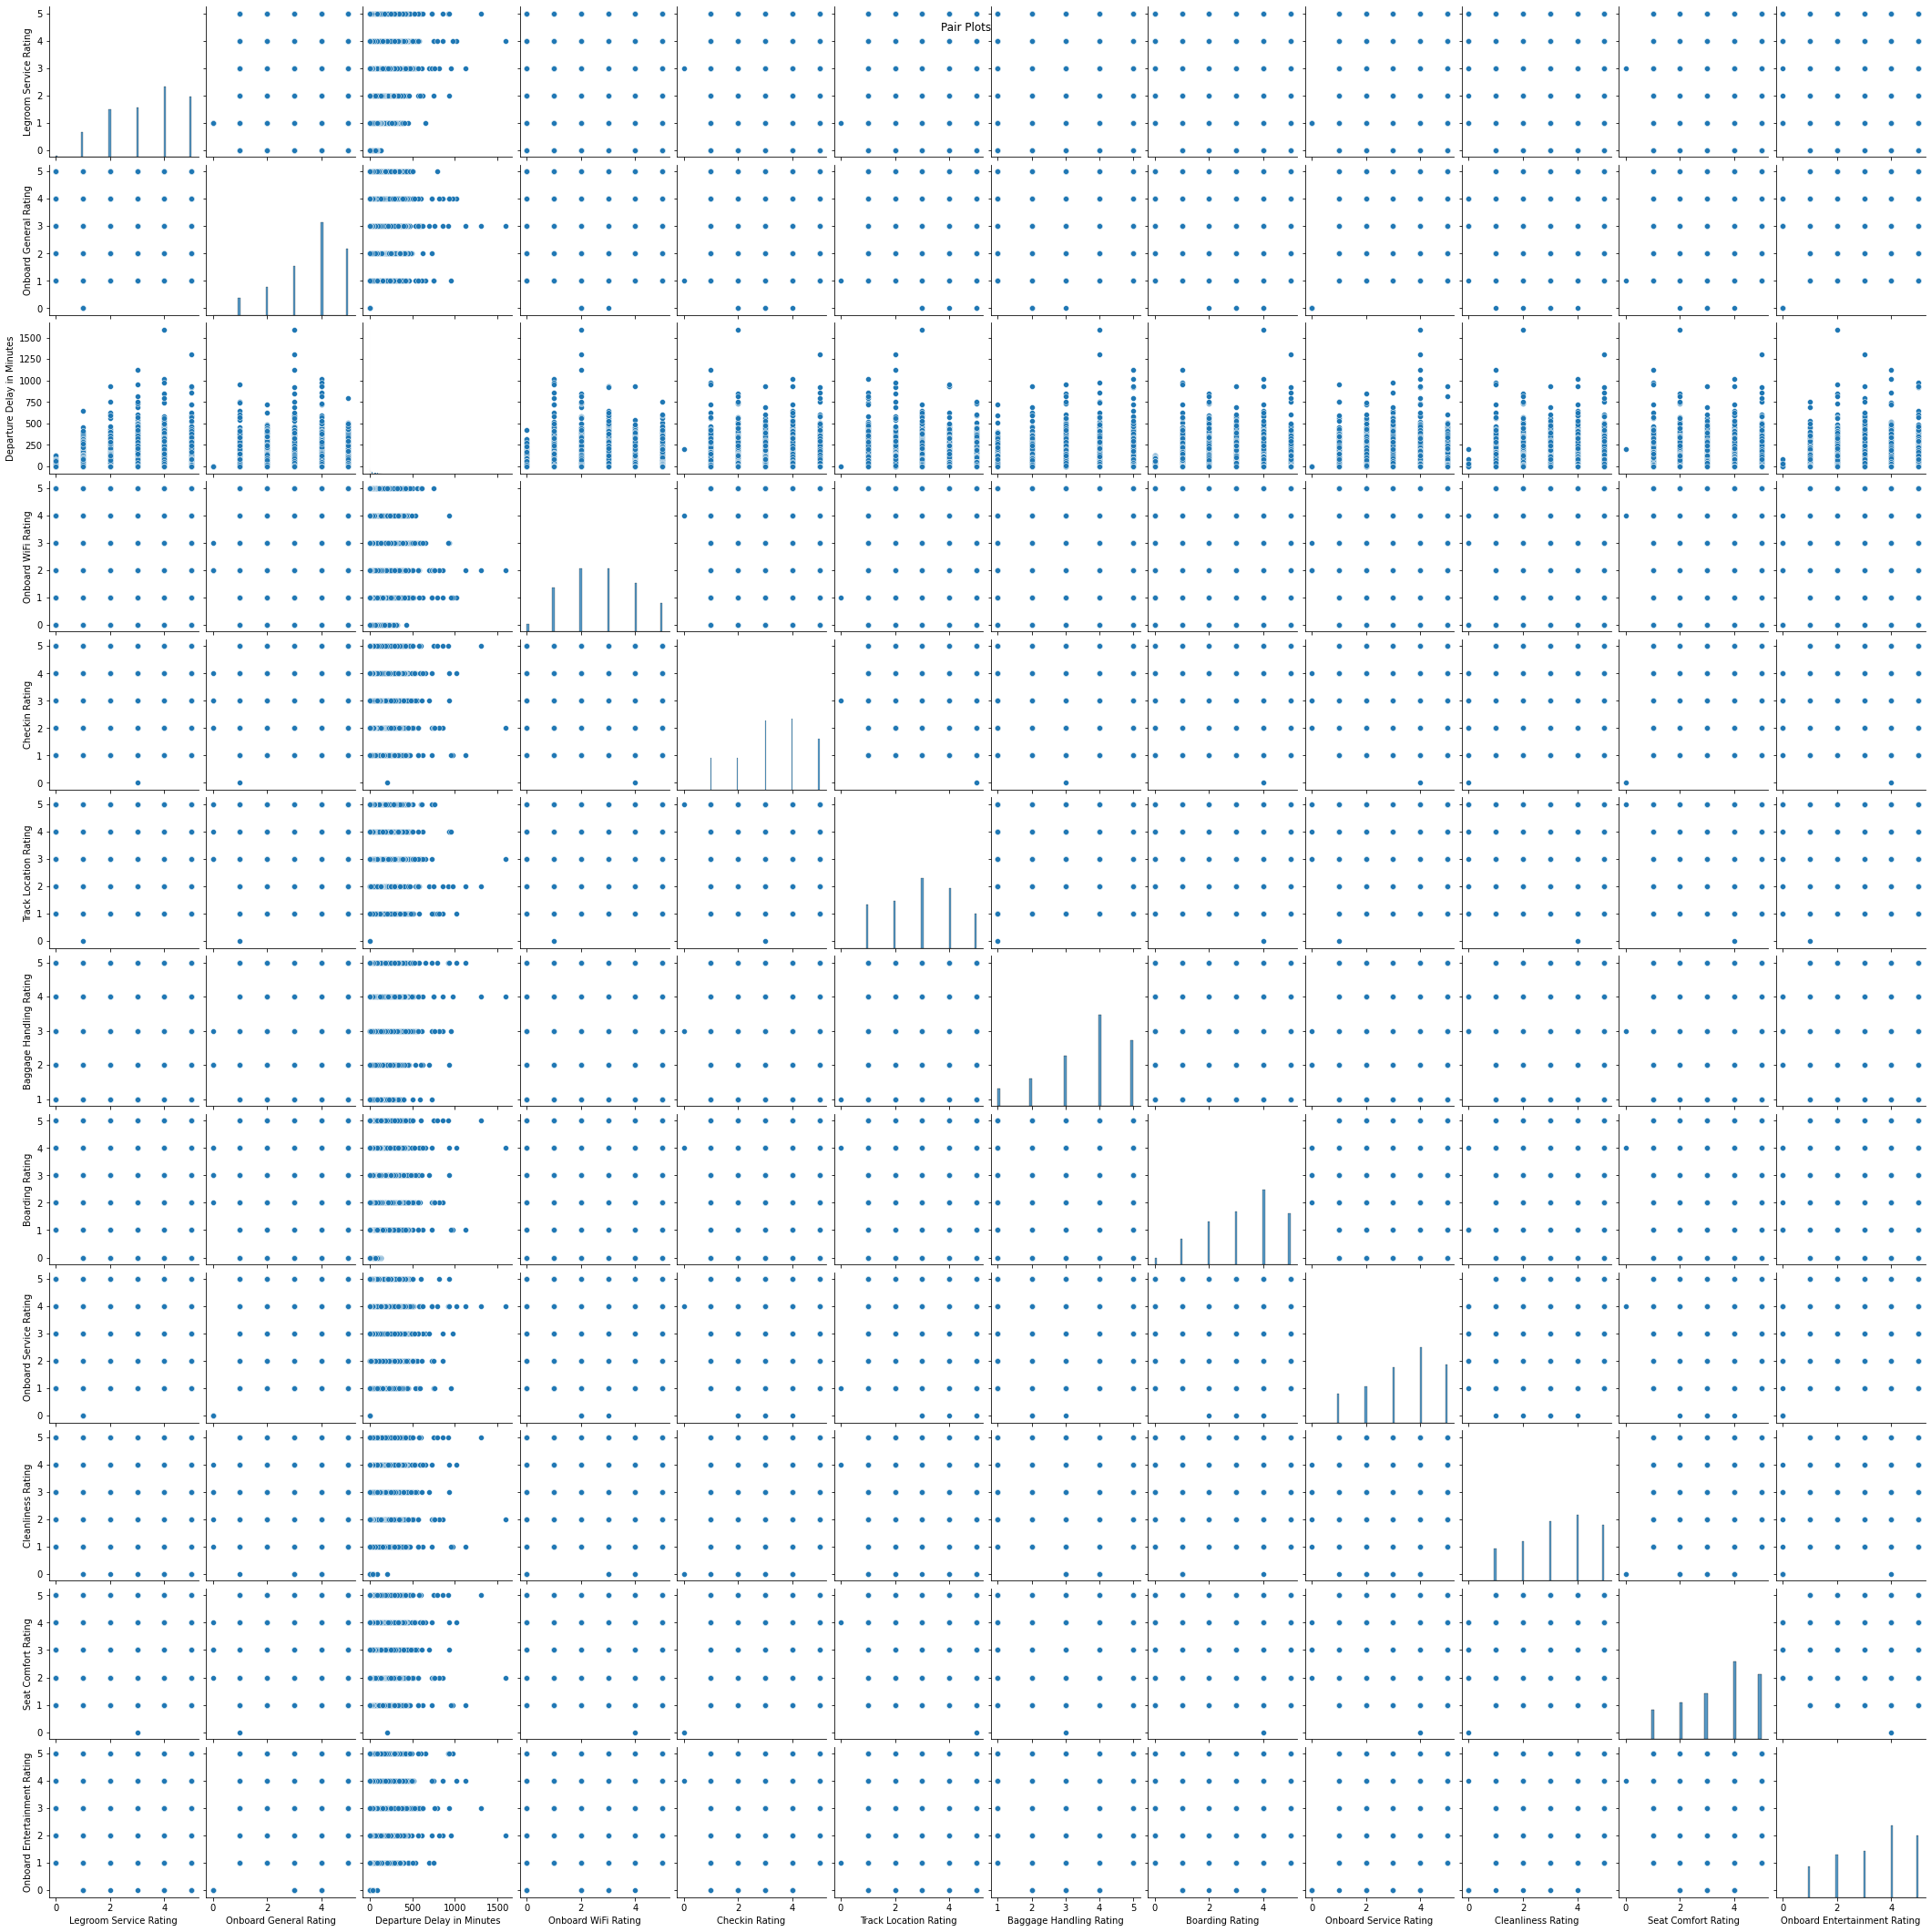

In [53]:
# Pairplots

sns.pairplot(df_trains, vars=['Legroom Service Rating', 'Onboard General Rating', 'Departure Delay in Minutes', 'Onboard WiFi Rating', 'Checkin Rating', 'Track Location Rating', 'Baggage Handling Rating', 'Boarding Rating', 'Onboard Service Rating', 'Cleanliness Rating', 'Seat Comfort Rating', 'Onboard Entertainment Rating'])
plt.suptitle("Pair Plots")
plt.show()

<AxesSubplot:xlabel='Satisfied', ylabel='Age'>

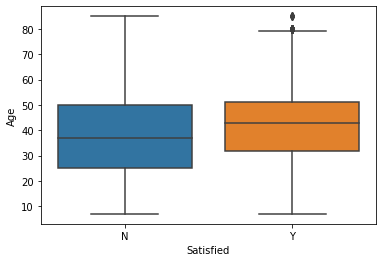

In [54]:
# Boxplots

sns.boxplot(data=df_trains, x='Satisfied', y='Age')

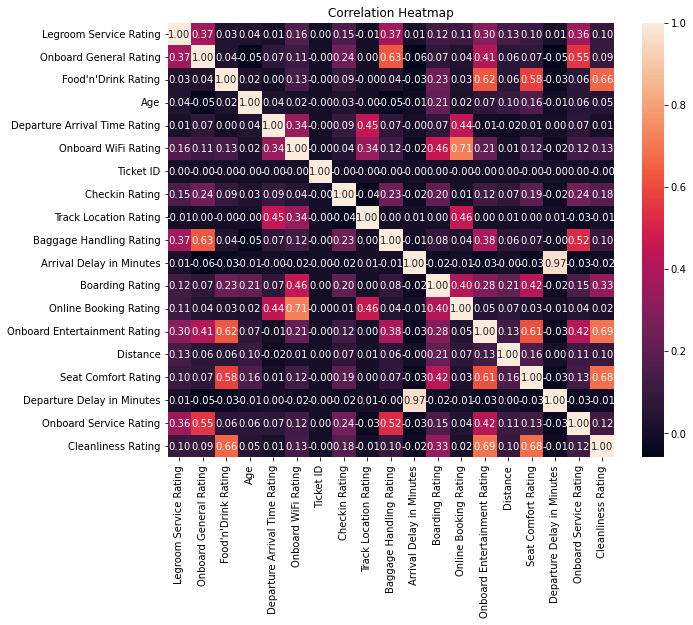

In [55]:
# Heatmap
correlation_matrix = df_trains.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


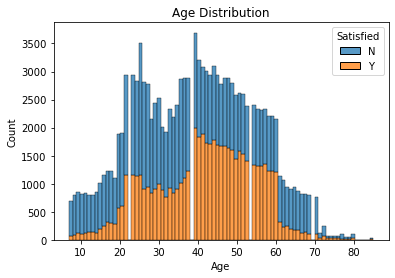

In [56]:
#Histplot

sns.histplot(data=df_trains, x='Age', hue='Satisfied', multiple='stack')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


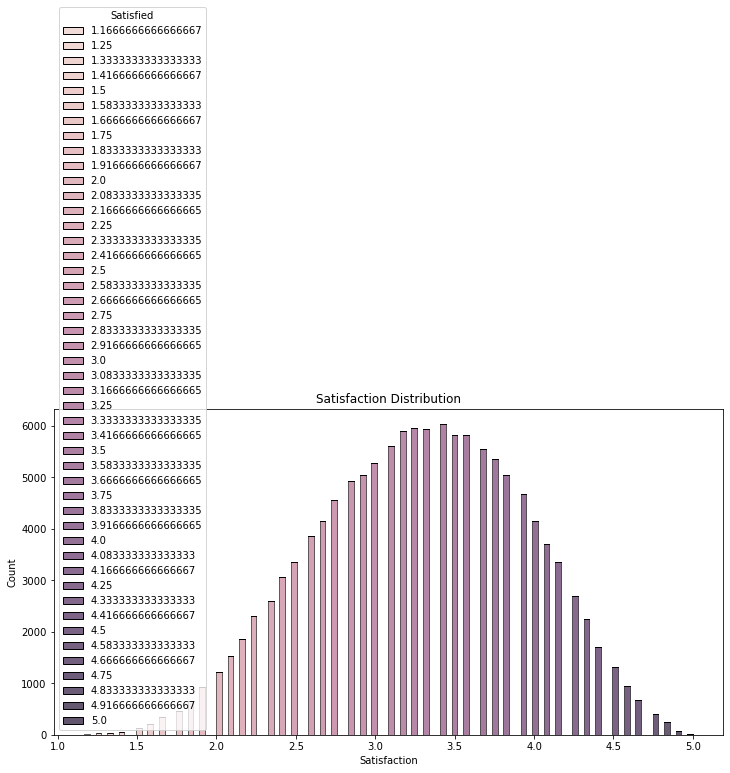

In [57]:
# Feature engineering
df_trains['Satisfied'] = (df_trains['Legroom Service Rating'] + df_trains['Onboard General Rating'] + df_trains['Baggage Handling Rating'] + df_trains['Cleanliness Rating'] + df_trains['Checkin Rating'] + df_trains['Departure Arrival Time Rating'] + df_trains['Food\'n\'Drink Rating'] + df_trains['Onboard Entertainment Rating'] + df_trains['Onboard Service Rating'] + df_trains['Online Booking Rating'] + df_trains['Seat Comfort Rating'] + df_trains['Track Location Rating']) / 12

plt.figure(figsize=(12, 6))
sns.histplot(data=df_trains, x='Satisfied', hue='Satisfied', multiple='stack')
plt.title('Satisfaction Distribution')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

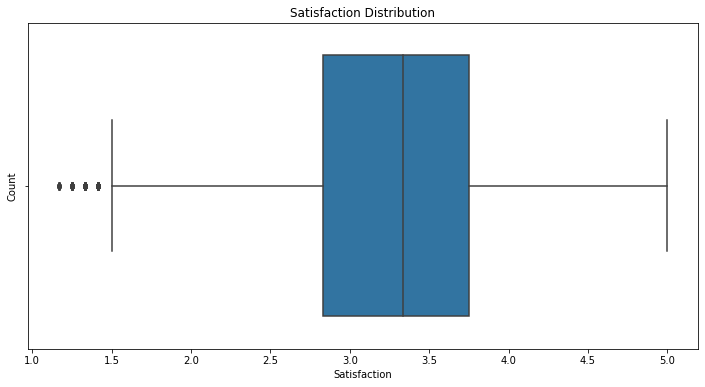

In [58]:
# Feature engineering
df_trains['Satisfied'] = (df_trains['Legroom Service Rating'] + df_trains['Onboard General Rating'] + df_trains['Baggage Handling Rating'] + df_trains['Cleanliness Rating'] + df_trains['Checkin Rating'] + df_trains['Departure Arrival Time Rating'] + df_trains['Food\'n\'Drink Rating'] + df_trains['Onboard Entertainment Rating'] + df_trains['Onboard Service Rating'] + df_trains['Online Booking Rating'] + df_trains['Seat Comfort Rating'] + df_trains['Track Location Rating']) / 12

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_trains, x='Satisfied', hue='Satisfied')
plt.title('Satisfaction Distribution')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

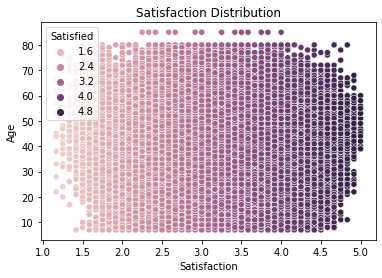

In [59]:
# Scatterplot

sns.scatterplot(data=df_trains, x='Satisfied', y='Age', hue='Satisfied')
plt.title('Satisfaction Distribution')
plt.xlabel('Satisfaction')
plt.ylabel('Age')
plt.show()

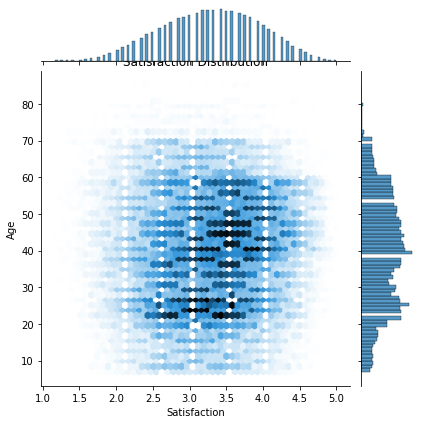

In [60]:
# Jointplot

sns.jointplot(data=df_trains, x='Satisfied', y='Age', kind='hex')
plt.title('Satisfaction Distribution')
plt.xlabel('Satisfaction')
plt.ylabel('Age')
plt.show()


# Create train and test sets

In [61]:
# Split data into train and test sets

from sklearn.model_selection import train_test_split
X = df_trains.drop('Satisfied', axis=1)
y = df_trains['Satisfied']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#It appears that you're encountering a ValueError because one or more columns in your dataset contain string values, and the StandardScaler expects numerical values. In your case, the 'Ticket Class' column seems to be a categorical variable with string values like 'Premium,' which cannot be directly scaled.

#You can use the LabelEncoder class from scikit-learn to convert the string values into numerical labels.
# https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn   

ValueError: could not convert string to float: 'Premium'

In [ ]:
# identify outliers
numerical_cols = df_trains.select_dtypes(include=['float64']).columns

Q1 = df_trains[numerical_cols].quantile(0.25)
Q3 = df_trains[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df_trains_no_outliers = df_trains[~((df_trains[numerical_cols] < (Q1 - 1.5 * IQR)) | (df_trains[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
from sklearn.impute import SimpleImputer

# Identify numerical and categorical columns
numerical_cols = df_trains_no_outliers.select_dtypes(include=['float64']).columns
categorical_cols = df_trains_no_outliers.select_dtypes(include=['object']).columns

# Impute numerical columns with mean
numerical_imputer = SimpleImputer(strategy='mean')
df_trains_no_outliers.loc[:, numerical_cols] = numerical_imputer.fit_transform(df_trains_no_outliers.loc[:, numerical_cols])

# Impute categorical columns with most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_trains_no_outliers.loc[:, categorical_cols] = categorical_imputer.fit_transform(df_trains_no_outliers.loc[:, categorical_cols])



/var/folders/yx/jk8yrkgs75365fm8spx_bqz00000gn/T/ipykernel_18728/255251880.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trains_no_outliers.loc[:, numerical_cols] = numerical_imputer.fit_transform(df_trains_no_outliers.loc[:, numerical_cols])
/var/folders/yx/jk8yrkgs75365fm8spx_bqz00000gn/T/ipykernel_18728/255251880.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trains_no_outliers.loc[:, categorical_cols] = categorical_imputer.fit_transform(df_trains_no_outliers.loc[:, categorical_cols])
